In [1]:
import pandas as pd

In [2]:
# Laste inn en CSV-fil som et DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/uit-bed-1304-h25/uit-bed-1304-h25.github.io/refs/heads/main/data/schooling-gdp.csv')

### OBS: FÅR DU FEILMEDLING OVER, SJEKK AT FILBANEN ER RIKTIG TIL DIN MAC/PC!!! ###

# Vise de første radene i DataFrame
data.head()

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.680,11.65,4886000
1,Kuwait,KWT,67029.523,6.39,2992000
2,Luxembourg,LUX,57882.809,11.33,508000
3,Switzerland,CHE,55688.020,12.92,7809000
4,United States,USA,49500.629,13.24,309011008


In [3]:
# 1. Viser kolonneoverskriftene
print(data.columns)

Index(['Land', 'Landkode', 'BNP_per_capita', 'Utdanning', 'Befolkning'], dtype='object')


In [4]:
# 2. Velg en spesifikk kolonne (BNP per capita)
bnp_column = data['BNP_per_capita']
print(bnp_column)

0      73262.68000
1      67029.52300
2      57882.80900
3      55688.02000
4      49500.62900
          ...     
101      972.04572
102      969.23077
103      845.86932
104      786.67023
105      634.97137
Name: BNP_per_capita, Length: 106, dtype: float64


In [5]:
# 3. Filtrer rader basert på en betingelse (land med utdanning > 10 år)
high_education = data[data['Utdanning'] > 10]
print(high_education)

                   Land Landkode  BNP_per_capita  Utdanning  Befolkning
0                Norway      NOR      73262.6800      11.65     4886000
2            Luxembourg      LUX      57882.8090      11.33      508000
3           Switzerland      CHE      55688.0200      12.92     7809000
4         United States      USA      49500.6290      13.24   309011008
5               Ireland      IRL      47823.5040      12.45     4554000
6             Australia      AUS      44854.9020      11.69    22155000
7           Netherlands      NLD      44004.1450      11.71    16683000
8               Denmark      DNK      43416.2230      11.97     5555000
9             Hong Kong      HKG      41687.9490      12.20     6966000
10              Germany      DEU      40627.2300      12.58    80827000
11              Austria      AUT      40489.8090      10.13     8410000
12               Sweden      SWE      40421.9060      11.95     9390000
13               Canada      CAN      40269.0310      12.74    3

In [6]:
# 4. Sjekke om det finnes noen manglende verdier (også kalt: NAN - Not a Number)
missing_values = data.isnull().sum()
print(missing_values)

Land              0
Landkode          0
BNP_per_capita    0
Utdanning         0
Befolkning        0
dtype: int64


In [7]:
# Alternativt til 4.
data.isna()
data.isna().sum()

Land              0
Landkode          0
BNP_per_capita    0
Utdanning         0
Befolkning        0
dtype: int64

In [8]:
# 5. Fyll manglende verdier (hvis det var noen) med 0
data.fillna(0, inplace=True)

In [9]:
# 6. Beskrivelse av numeriske verdier
description = data.describe()
print(description)

       BNP_per_capita   Utdanning    Befolkning
count      106.000000  106.000000  1.060000e+02
mean     17295.935035    8.629434  5.755919e+07
std      16527.233275    2.918427  1.807718e+08
min        634.971370    1.950000  2.820000e+05
25%       4037.425625    6.425000  6.290000e+06
50%      11444.386500    8.745000  1.482050e+07
75%      27165.069000   11.110000  4.025450e+07
max      73262.680000   13.240000  1.368811e+09


In [10]:
# 7. Sortere data etter BNP per capita (stigende)
sorted_data = data.sort_values('BNP_per_capita', ascending=True)
print(sorted_data)

                             Land Landkode  BNP_per_capita  Utdanning  \
105  Democratic Republic of Congo      COD       634.97137       3.79   
104                       Liberia      LBR       786.67023       4.35   
103                         Niger      NER       845.86932       1.95   
102                    Mozambique      MOZ       969.23077       2.03   
101                        Malawi      MWI       972.04572       5.01   
..                            ...      ...             ...        ...   
4                   United States      USA     49500.62900      13.24   
3                     Switzerland      CHE     55688.02000      12.92   
2                      Luxembourg      LUX     57882.80900      11.33   
1                          Kuwait      KWT     67029.52300       6.39   
0                          Norway      NOR     73262.68000      11.65   

     Befolkning  
105    64564000  
104     3891000  
103    16464000  
102    23532000  
101    14540000  
..          ...

In [11]:
# 8. Se datatypene
data_types = data.dtypes
print(data_types)

Land               object
Landkode           object
BNP_per_capita    float64
Utdanning         float64
Befolkning          int64
dtype: object


In [12]:
# 9. Konvertere en kolonne til en annen datatype (Befolkning til float)

data['Befolkning'] = data['Befolkning'].astype(float)
data['Befolkning']

0        4886000.0
1        2992000.0
2         508000.0
3        7809000.0
4      309011008.0
          ...     
101     14540000.0
102     23532000.0
103     16464000.0
104      3891000.0
105     64564000.0
Name: Befolkning, Length: 106, dtype: float64

In [13]:
# 10. Ny kolonne som er en funksjon av andre kolonner (BNP total)
data['BNP_total'] = data['BNP_per_capita'] * data['Befolkning']
print(data)

                             Land Landkode  BNP_per_capita  Utdanning  \
0                          Norway      NOR     73262.68000      11.65   
1                          Kuwait      KWT     67029.52300       6.39   
2                      Luxembourg      LUX     57882.80900      11.33   
3                     Switzerland      CHE     55688.02000      12.92   
4                   United States      USA     49500.62900      13.24   
..                            ...      ...             ...        ...   
101                        Malawi      MWI       972.04572       5.01   
102                    Mozambique      MOZ       969.23077       2.03   
103                         Niger      NER       845.86932       1.95   
104                       Liberia      LBR       786.67023       4.35   
105  Democratic Republic of Congo      COD       634.97137       3.79   

      Befolkning     BNP_total  
0      4886000.0  3.579615e+11  
1      2992000.0  2.005523e+11  
2       508000.0  2.9404

In [14]:
# 11. Finne dupliserte rader
duplicates = data.duplicated()
print(duplicates)

# Her summerer vi 'duplicates' - husk at False = 0, True = 1
# så hvis summen er lik '0' - så betyr det at det ikke er duplikater.
print(sum(duplicates))

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool
0


In [15]:
# 12. Fjerne duplikater
data.drop_duplicates(inplace=True)

<Axes: ylabel='Frequency'>

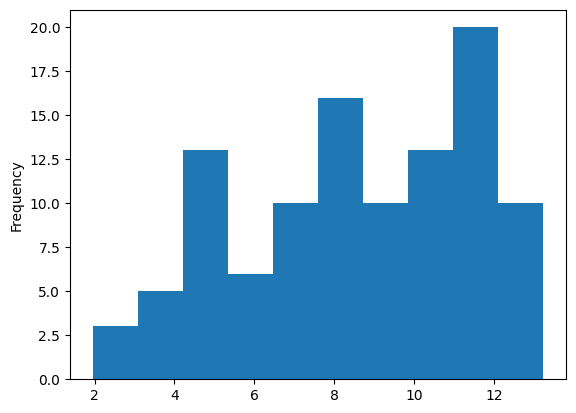

In [16]:
# 13. Plot et histogram over utdanningsnivå
data['Utdanning'].plot(kind='hist')

In [17]:
# 14. Bruke .loc for å hente data for et spesifikt land
norway_data = data.loc[data['Land'] == 'Norway']
print(norway_data)

     Land Landkode  BNP_per_capita  Utdanning  Befolkning     BNP_total
0  Norway      NOR        73262.68      11.65   4886000.0  3.579615e+11


In [18]:
# 15. Bruke .iloc for å hente rader og kolonner basert på indeks
subset = data.iloc[0:5, 0:3]  # Første 5 rader, første 3 kolonner
print(subset)

            Land Landkode  BNP_per_capita
0         Norway      NOR       73262.680
1         Kuwait      KWT       67029.523
2     Luxembourg      LUX       57882.809
3    Switzerland      CHE       55688.020
4  United States      USA       49500.629


In [19]:
# 16. Oppsummerende statistikk over BNP per innbygger
print("Gjennomsnittlig BNP per innbygger:", data['BNP_per_capita'].mean())
print("Median BNP per innbygger:", data['BNP_per_capita'].median())
print("Høyeste BNP per innbygger:", data['BNP_per_capita'].max())
print("Laveste BNP per innbygger:", data['BNP_per_capita'].min())

Gjennomsnittlig BNP per innbygger: 17295.935035
Median BNP per innbygger: 11444.3865
Høyeste BNP per innbygger: 73262.68
Laveste BNP per innbygger: 634.97137


In [20]:
# hente CSV fra SSB til pandas

# Importerer Python pandas for å kunne lage dataframe
import pandas as pd

# pd.read_csv() henter innholdet fra API-et og legger det i data. 
# De norske datasettene her er semikolonseparert med komma som desimaltegn.
# CSV er ikke UTF-8, så vi må angi parameter encoding for å få æøå riktig. 

data = pd.read_csv("https://data.ssb.no/api/v0/dataset/1066.csv?lang=no", sep=';', decimal=',', encoding = "ISO-8859-1", )

In [21]:
#
type(data)

pandas.core.frame.DataFrame

In [22]:
#
data.shape

(13, 4)

In [23]:
#
data.head()

,næring,måned,statistikkvariabel,"07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel"
0,"47 Detaljhandel, unntatt salg av motorvogner",2024M07,"Volumindeks, sesongjustert",91.8
1,"47 Detaljhandel, unntatt salg av motorvogner",2024M08,"Volumindeks, sesongjustert",92.3
2,"47 Detaljhandel, unntatt salg av motorvogner",2024M09,"Volumindeks, sesongjustert",92.2
3,"47 Detaljhandel, unntatt salg av motorvogner",2024M10,"Volumindeks, sesongjustert",92.6
4,"47 Detaljhandel, unntatt salg av motorvogner",2024M11,"Volumindeks, sesongjustert",93.2


In [24]:
#
data['måned']= pd.to_datetime(data['måned'].str.replace('M', '-'))

#
data.index = data['måned']

#
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2024-07-01 to 2025-07-01
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   næring                                                                 13 non-null     object        
 1   måned                                                                  13 non-null     datetime64[ns]
 2   statistikkvariabel                                                     13 non-null     object        
 3   07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel  13 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 520.0+ bytes


In [25]:
# Se hva som skjedde med 'måned' kolonnen nå!
data.head()

,næring,måned,statistikkvariabel,"07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel"
måned,,,,
2024-07-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-07-01,"Volumindeks, sesongjustert",91.8
2024-08-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-08-01,"Volumindeks, sesongjustert",92.3
2024-09-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-09-01,"Volumindeks, sesongjustert",92.2
2024-10-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-10-01,"Volumindeks, sesongjustert",92.6
2024-11-01,"47 Detaljhandel, unntatt salg av motorvogner",2024-11-01,"Volumindeks, sesongjustert",93.2


<Axes: xlabel='måned'>

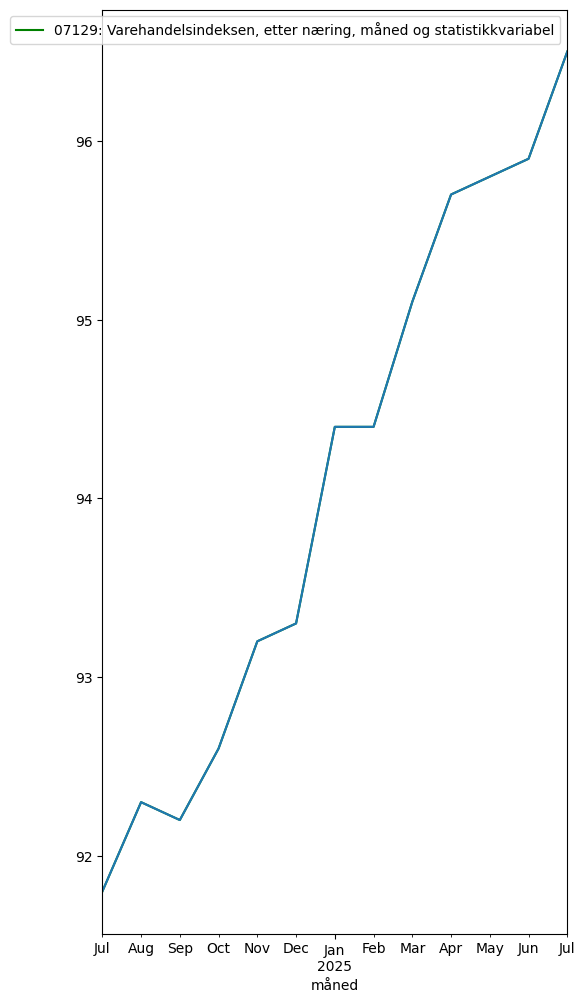

In [26]:
# 
data.plot(x='måned', y='07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel', figsize=(6, 12), color ='g')

# 
data_serie = data['07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel']

# 
data_serie.plot()

In [27]:
#%pip install eurostat

In [28]:
import eurostat
toc = eurostat.get_toc_df()
toc

,title,code,type,last update of data,last table structure change,data start,data end
0,"Number of households by household composition,...",LFST_HHNHWHTC$DV_1623,dataset,2024-09-12T23:00:00+0200,2024-04-24T23:00:00+0200,None,None
1,Percentage of part-time employment of adults b...,LFST_HHPTECHI,dataset,2025-06-12T23:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
2,Percentage of part-time employment of adults b...,LFST_HHPTECHI$DV_1903,dataset,2024-09-12T23:00:00+0200,2024-04-24T23:00:00+0200,None,None
3,"Percentage of part-time employment by sex, age...",LFST_HHPTETY,dataset,2025-06-12T23:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
4,"Percentage of self-employed adults by sex, age...",LFST_HHSECHI,dataset,2025-06-12T23:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
...,...,...,...,...,...,...,...
8018,Postal services falling under the universal se...,POST_CUBE1_X$USO701,dataset,2025-04-15T12:44:56Z,2025-04-15T12:44:56Z,None,None
8019,Postal services,POST_CUBE1_X,dataset,2025-04-15T12:43:15Z,2025-04-15T12:43:15Z,2012,2023
8020,Number of enterprises providing postal services,POST_CUBE1_X$NUM701,dataset,2025-04-15T12:44:56Z,2025-04-15T12:44:56Z,None,None
8021,Access points (USP under direct or indirect d...,POST_CUBE1_X$POST_ACC_1,dataset,2025-04-15T12:44:56Z,2025-04-15T12:44:56Z,None,None


In [29]:
gdp_in_toc_list = ['GDP per capita' in i for i in toc['title']]

In [30]:
# collecting only the tables where 'GDP per capita' is in the name
toc_gdp = toc[gdp_in_toc_list]
toc_gdp

,title,code,type,last update of data,last table structure change,data start,data end
2258,Real GDP per capita,TIPSNA40,dataset,2025-08-26T23:00:00+0200,2025-04-14T23:00:00+0200,1995,2024
3197,GDP per capita in PPS,TEC00114,dataset,2025-07-10T11:00:00+0200,2025-03-27T11:00:00+0100,2013,2024
3925,Real GDP per capita,SDG_08_10,dataset,2025-08-26T23:00:00+0200,2025-04-14T23:00:00+0200,2000,2024
3939,Purchasing power adjusted GDP per capita,SDG_10_10,dataset,2025-07-10T11:00:00+0200,2025-06-18T23:00:00+0200,2000,2024


In [31]:
gdp_data = eurostat.get_data_df('TIPSNA40')
gdp_data

,freq,unit,na_item,geo\TIME_PERIOD,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,A,CLV15_EUR_HAB,B1GQ,AT,30290.0,30920.0,31540.0,32610.0,33770.0,34760.0,...,39640.0,39970.0,40620.0,41430.0,41970.0,39140.0,40860.0,42540.0,41770.0,41140.0
1,A,CLV15_EUR_HAB,B1GQ,BE,28400.0,28720.0,29740.0,30260.0,31250.0,32340.0,...,36860.0,37110.0,37510.0,38040.0,38760.0,36740.0,38870.0,40190.0,40330.0,40500.0
2,A,CLV15_EUR_HAB,B1GQ,BG,3630.0,3840.0,3320.0,3460.0,3190.0,3350.0,...,6560.0,6840.0,7130.0,7410.0,7800.0,7620.0,8270.0,8660.0,8850.0,9110.0
3,A,CLV15_EUR_HAB,B1GQ,CY,17530.0,17470.0,17680.0,18530.0,19240.0,20180.0,...,20810.0,22060.0,23130.0,24300.0,25390.0,24240.0,26600.0,27990.0,28220.0,28730.0
4,A,CLV15_EUR_HAB,B1GQ,CZ,10320.0,10770.0,10720.0,10690.0,10850.0,11290.0,...,16230.0,16640.0,17490.0,17960.0,18570.0,17670.0,18380.0,18450.0,18260.0,18450.0
5,A,CLV15_EUR_HAB,B1GQ,DE,28980.0,29220.0,29750.0,30400.0,31050.0,31930.0,...,37950.0,38550.0,39540.0,39930.0,40300.0,38670.0,40250.0,40710.0,39990.0,39680.0
6,A,CLV15_EUR_HAB,B1GQ,DK,39110.0,39990.0,41080.0,41900.0,43000.0,44450.0,...,47900.0,48970.0,50150.0,50830.0,51500.0,50470.0,53520.0,53290.0,53230.0,54820.0
7,A,CLV15_EUR_HAB,B1GQ,EA20,24610.0,24970.0,25590.0,26300.0,27030.0,27990.0,...,31120.0,31590.0,32340.0,32830.0,33270.0,31220.0,33180.0,34170.0,34150.0,34340.0
8,A,CLV15_EUR_HAB,B1GQ,EE,6410.0,6840.0,7830.0,8250.0,8300.0,8990.0,...,16000.0,16460.0,17390.0,17990.0,18580.0,17990.0,19260.0,19240.0,18200.0,18030.0
9,A,CLV15_EUR_HAB,B1GQ,EL,14290.0,14430.0,14870.0,15300.0,15650.0,16230.0,...,16210.0,16270.0,16540.0,16920.0,17320.0,15760.0,17220.0,18310.0,18800.0,19250.0
